In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
per = lambda x: x / 15000 * 100

# Обработка данных

In [3]:
data = pd.read_csv("../data/tinkoff_legal_entities_new.csv")

In [4]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
3290,a5018189860a,2022-02-05 00:00:00,4,0.0,0.0,0.0,600.0,0.0,4.0,0.0,...,NaN,4.20,22.0,7.0,NaN,NaN,0.000000,0.0,NaN,NaN
3482,a7603062659a,2021-06-03 00:00:00,1,0.0,0.0,0.0,645.0,0.0,1.0,0.0,...,NaN,NaN,0.0,0.0,4.000000,0.0,0.000000,0.0,NaN,NaN
1,a7706752171a,2022-01-15 00:00:00,16,0.0,0.0,0.0,2421.0,0.0,16.0,0.0,...,NaN,4.15,114.0,39.0,3.700000,1.0,0.142857,2.0,4.8,5.0
5811,a2724235875a,2022-01-11 00:00:00,15,0.0,0.0,0.0,2031.0,0.0,15.0,0.0,...,NaN,4.40,3214.0,834.0,3.666667,0.0,1.987500,113.0,NaN,NaN
2585,a7116016933a,2022-05-14 00:00:00,7,0.0,0.0,0.0,1490.0,0.0,7.0,NaN,...,NaN,4.20,4.0,2.0,4.250000,0.0,0.000000,0.0,NaN,NaN


In [5]:
data.shape

(15000, 35)

## работа с NaN

In [6]:
data.isna().sum() / data.shape[0] * 100

id                           0.000000
date                         0.000000
phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya   

<AxesSubplot:>

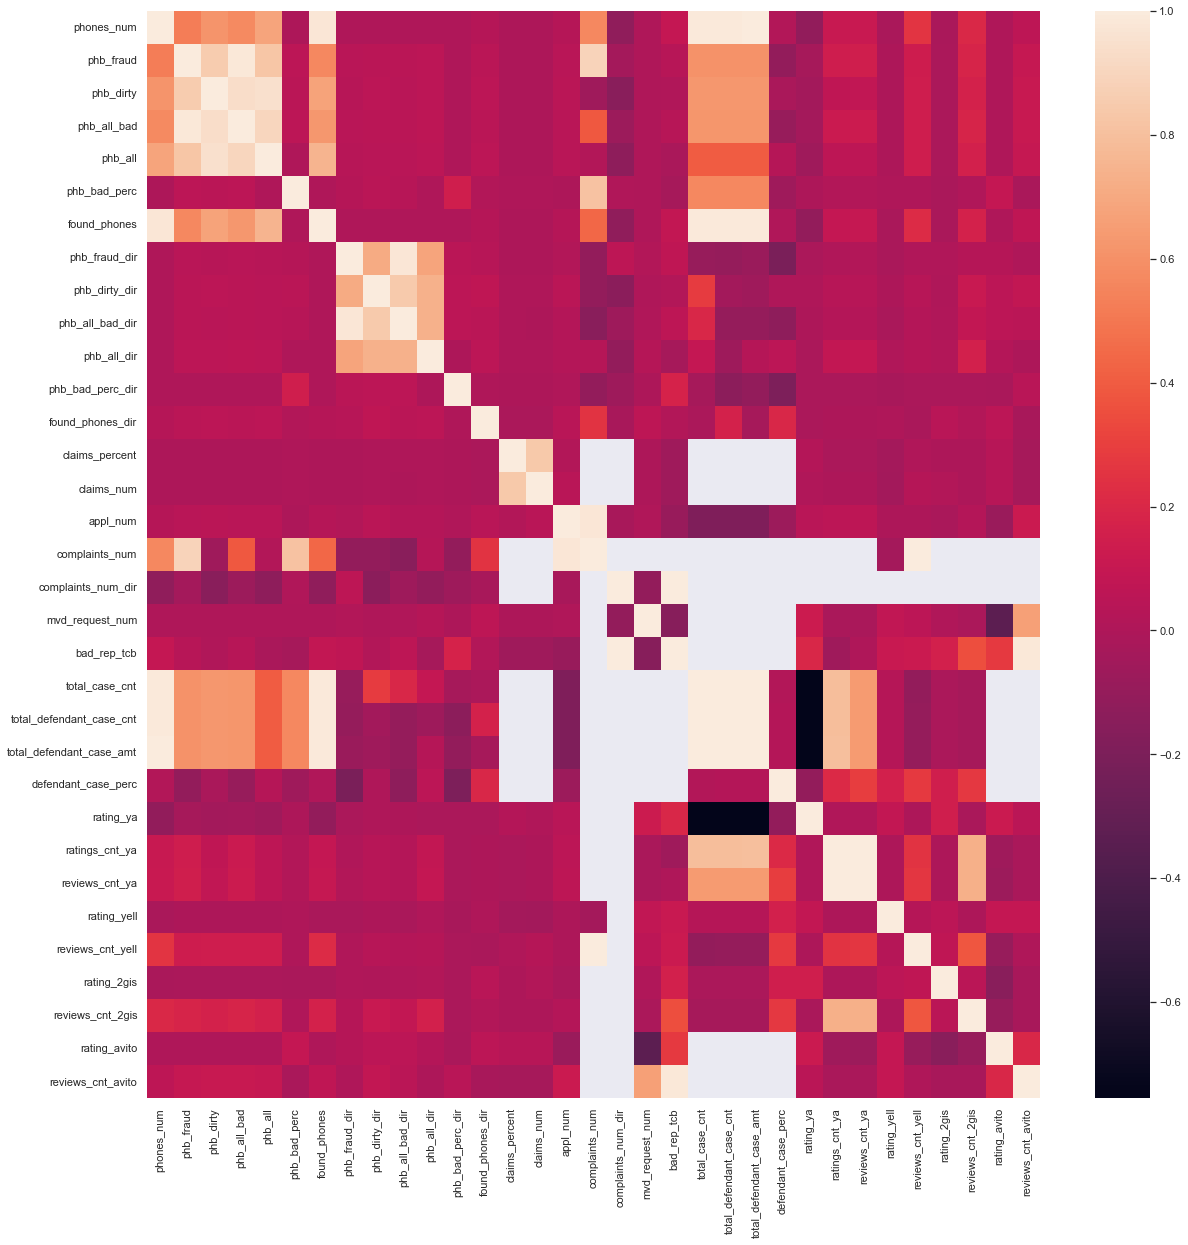

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())

In [8]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [9]:
data.phb_bad_perc_dir.isna().sum()

1231

In [10]:
data.phb_all_dir.isna().sum()

1231

In [11]:
data.phones_num.isna().sum()

0

In [12]:
data.claims_percent.value_counts()

0.00      9818
50.00       25
33.33       19
40.00        7
66.67        7
100.00       4
60.00        3
25.00        3
58.33        1
57.14        1
63.64        1
75.00        1
42.86        1
85.71        1
70.00        1
14.29        1
7.14         1
20.00        1
62.50        1
71.43        1
Name: claims_percent, dtype: int64

In [13]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
]

reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_2gis",
    "reviews_cnt_avito"
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir", # !
    "phb_all_bad_dir", # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num"
]

In [14]:
data[rating_columns] = data[rating_columns].fillna(-1)

In [15]:
data[reviews_count_columns] = data[reviews_count_columns].fillna(-1)

In [16]:
data[phones] = data[phones].fillna(0)

In [17]:
data[bank_and_police] = data[bank_and_police].fillna(0)

In [18]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                   5102
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [19]:
data[data_without_description] = data[data_without_description].fillna(0)

In [20]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                      0
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [21]:
data.to_csv("../data/clean_data.csv", index=False)

In [ ]:
[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8]

/var/folders/64/q9vthv094_591jd1jlz91_x00000gn/T/ipykernel_58331/446347792.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.set_ticklabels([-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=40)


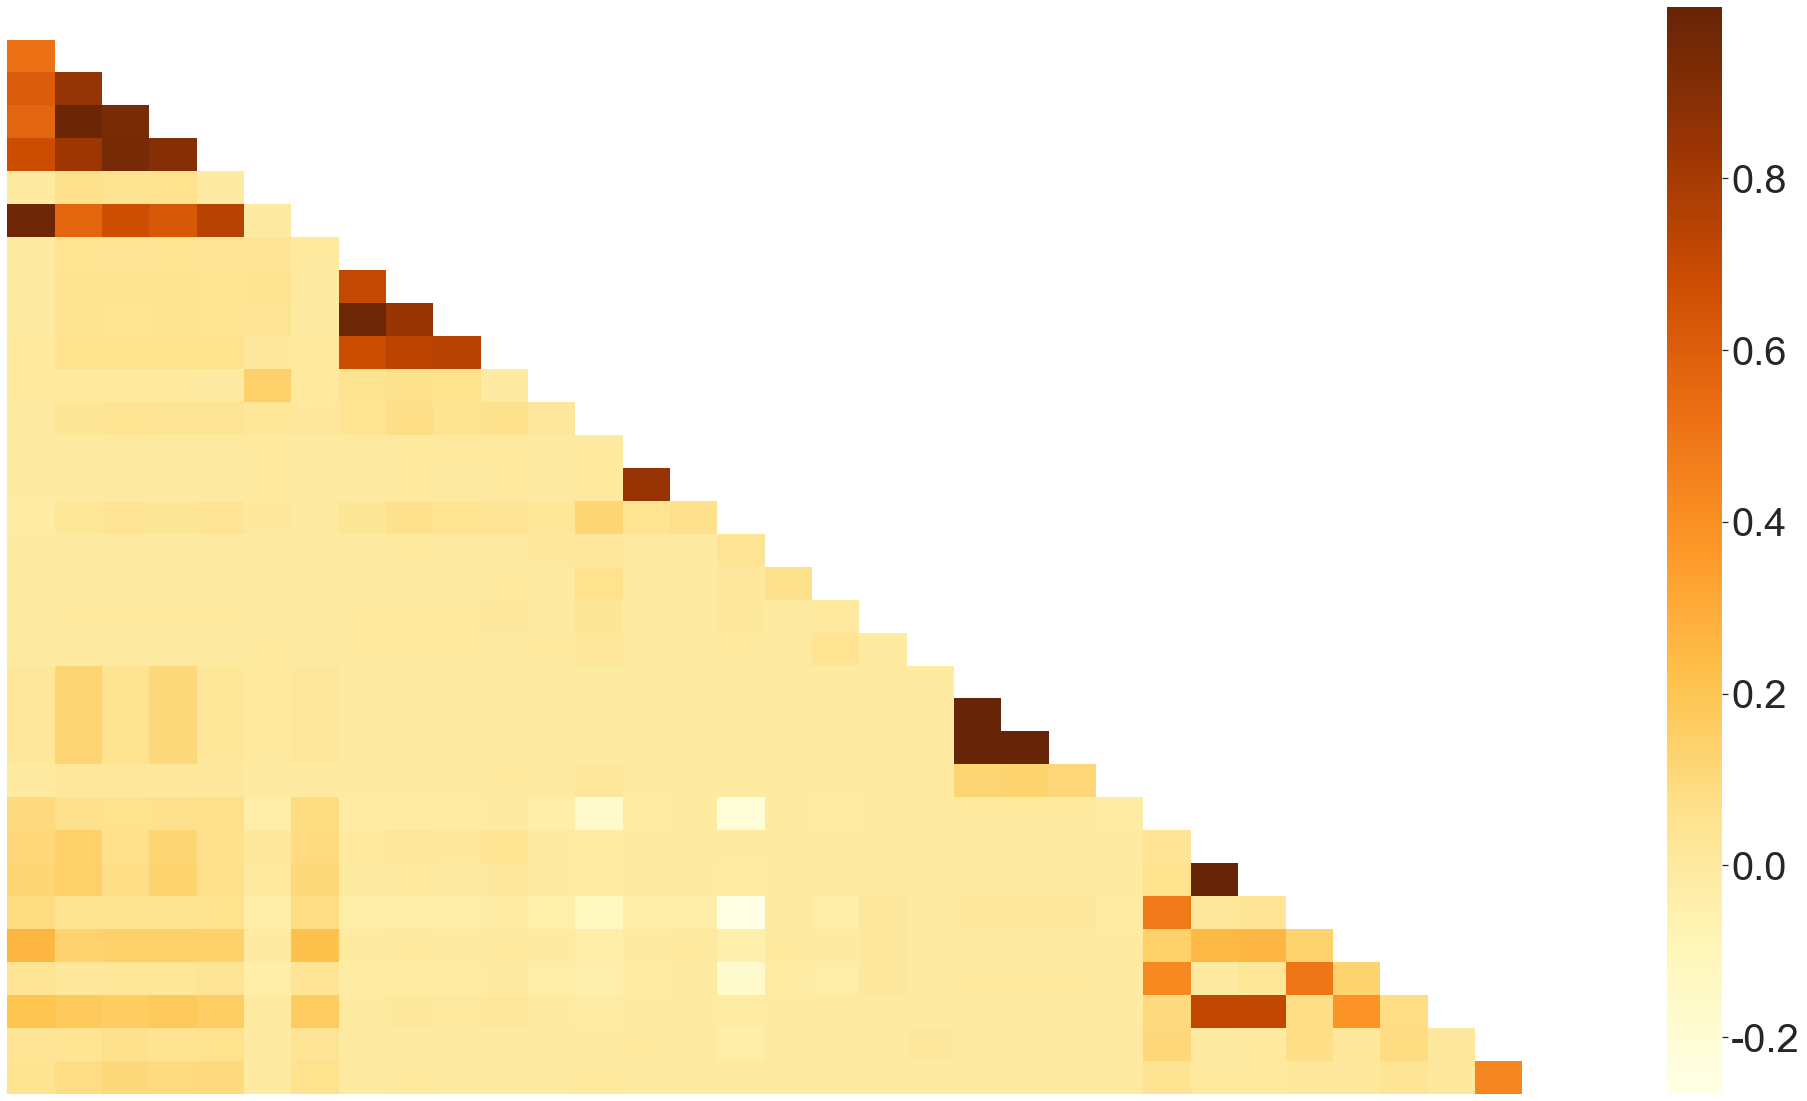

In [45]:
import numpy as np
sns.set_theme(style='white')
plt.figure(figsize=(35, 20))
matrix = np.triu(data.corr())
ax = sns.heatmap(
    data.corr(),
    mask=matrix,
    cmap=sns.color_palette("YlOrBr", as_cmap=True)
) #  cmap=sns.cubehelix_palette(as_cmap=True)
ax.set_yticklabels([])
ax.set_xticklabels([])
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels([-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=40)
plt.savefig("figures/corr.png", pad_inches=0.5, dpi=99)
plt.show()

/var/folders/64/q9vthv094_591jd1jlz91_x00000gn/T/ipykernel_58331/3882226990.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.set_ticklabels([-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=40)


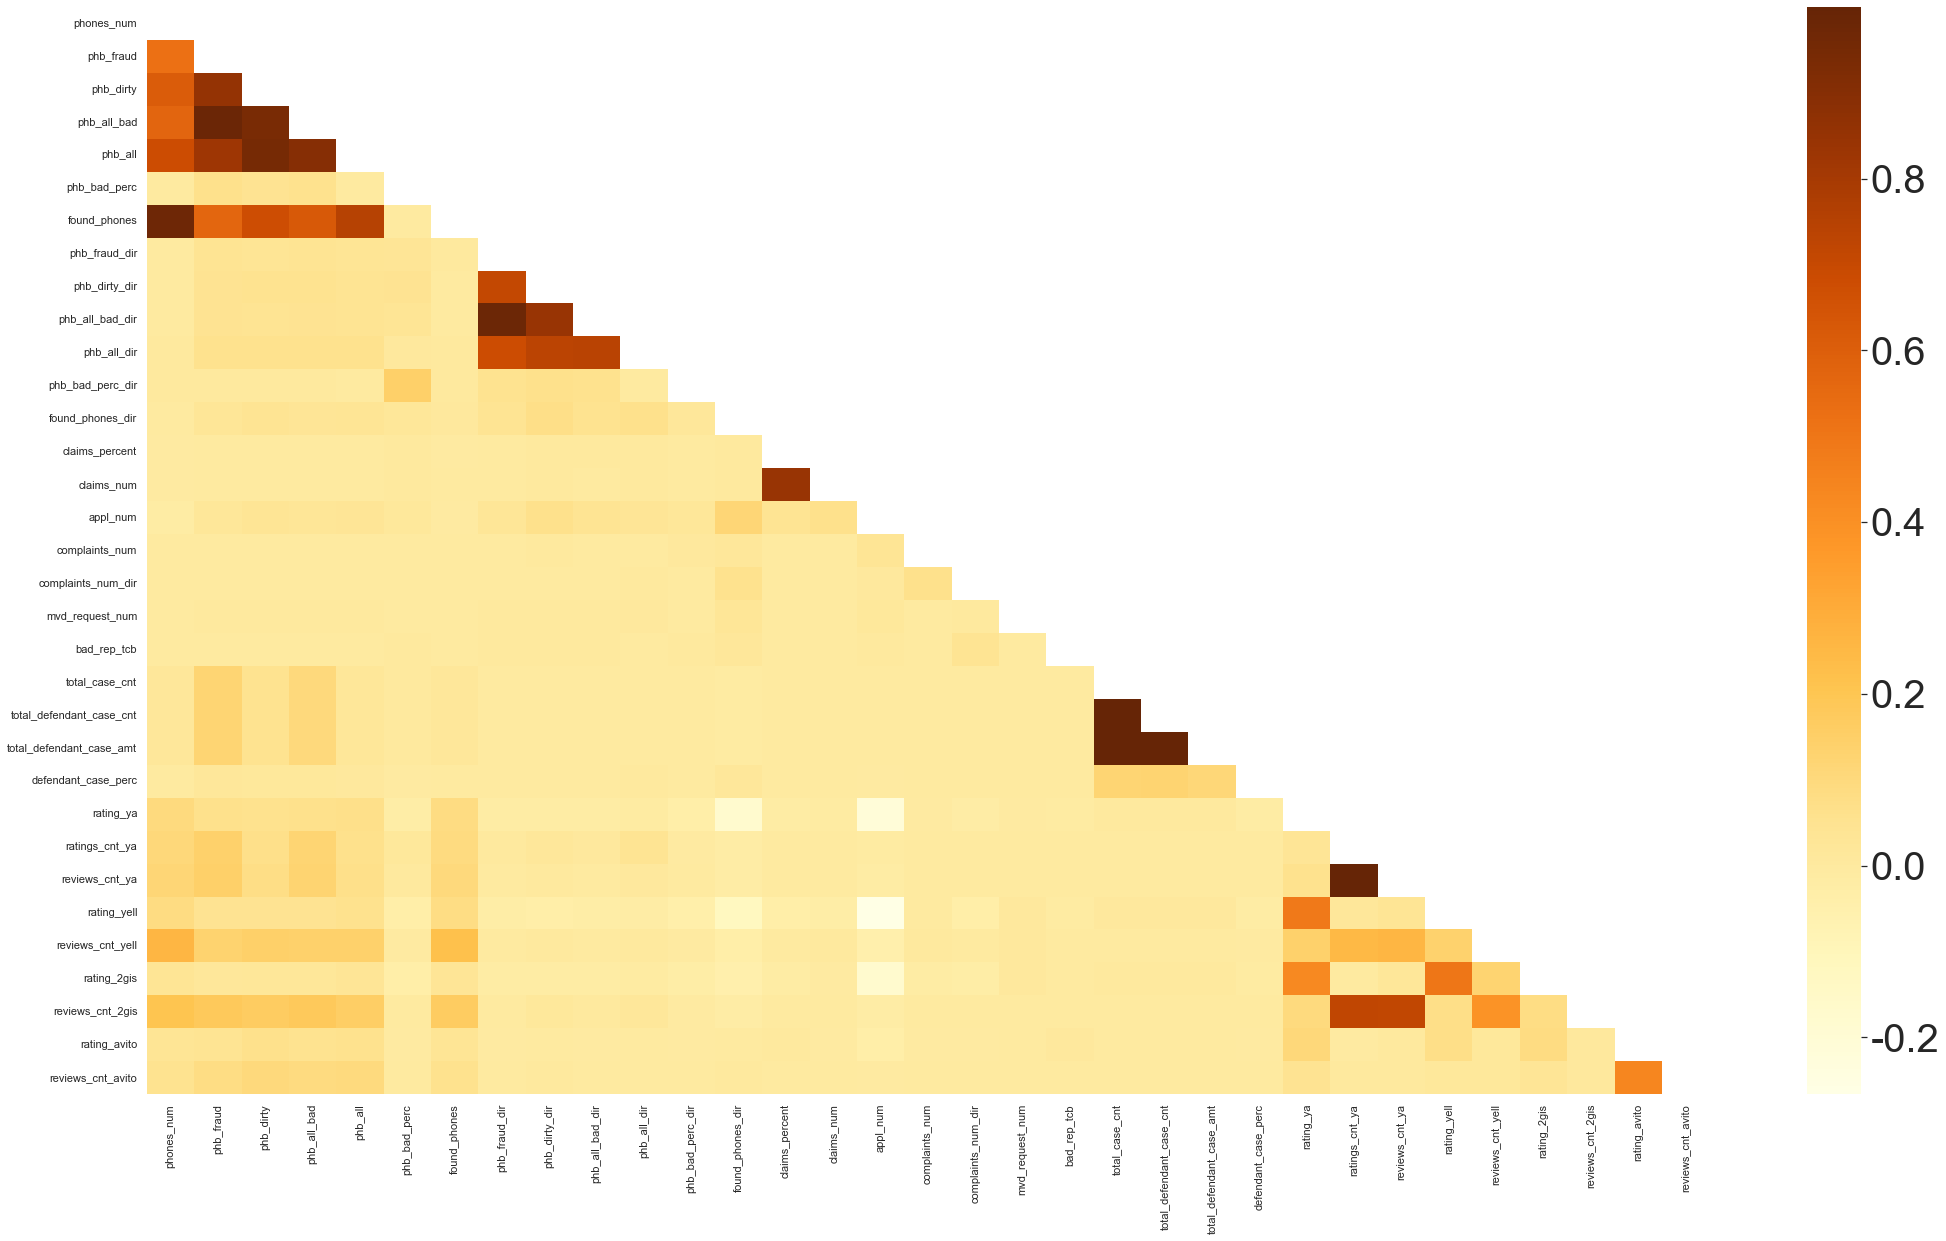

In [46]:
sns.set_theme(style='white')
plt.figure(figsize=(35, 20))
matrix = np.triu(data.corr())
ax = sns.heatmap(
    data.corr(),
    mask=matrix,
    cmap=sns.color_palette("YlOrBr", as_cmap=True)
) #  cmap=sns.cubehelix_palette(as_cmap=True)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels([-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=40)

In [ ]:
data.info()

In [ ]:
data.date = pd.to_datetime(data.date)

In [201]:
to_int_columns = [
    "appl_num",
    "bad_rep_tcb",
    "claims_num",
    "complaints_num",
    "complaints_num_dir",
    "found_phones",
    "found_phones_dir",
    "mvd_request_num",
    "phb_all",
    "phb_all_bad",
    "phb_all_bad_dir",
    "phb_all_dir",
    "phb_dirty",
    "phb_dirty_dir",
    "phb_fraud",
    "phb_fraud_dir",
    "phones_num",
    "ratings_cnt_ya",
    "reviews_cnt_2gis",
    "reviews_cnt_avito",
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "total_case_cnt",
    "total_defendant_case_amt",
    "total_defendant_case_cnt"
]

In [202]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                      0
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [203]:
# data[to_int_columns] = data[to_int_columns].astype(int)

In [204]:
data.id.nunique()

14787

In [205]:
data.duplicated().sum()

0

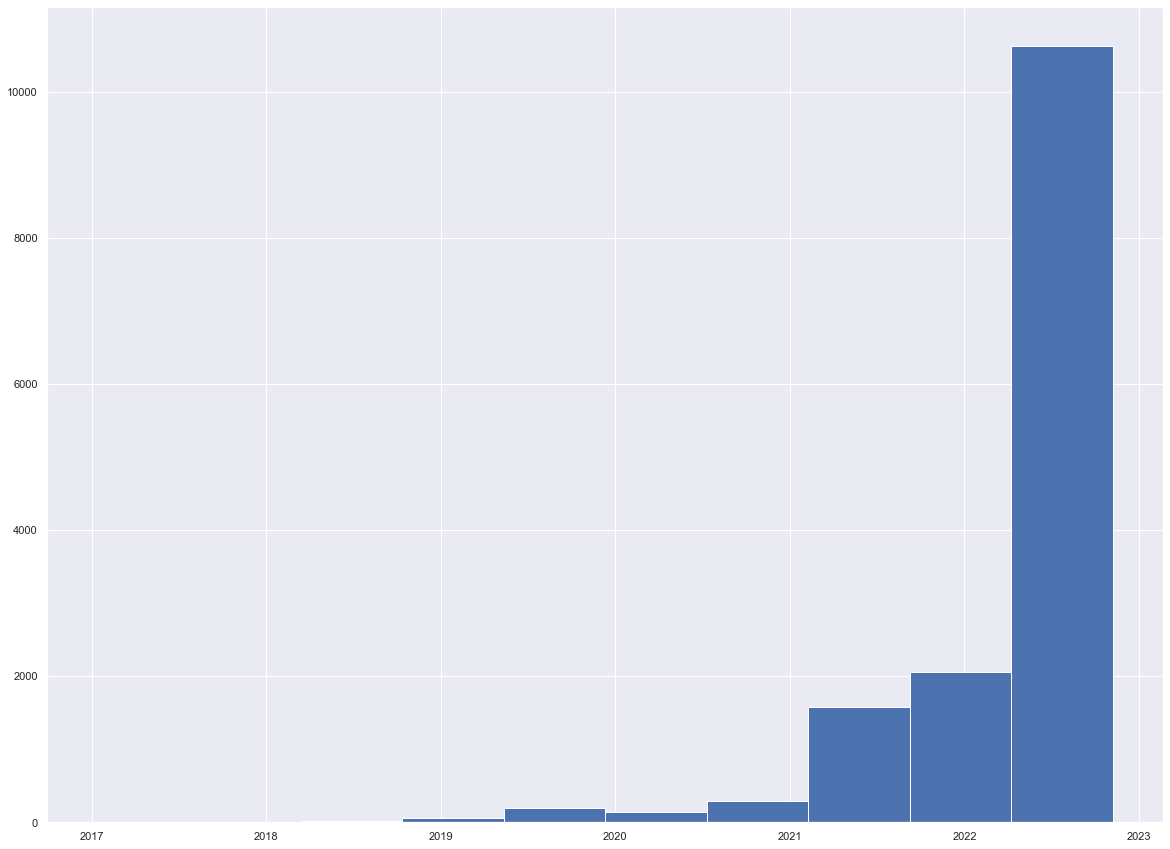

In [206]:
plt.figure(figsize=(20, 15))
plt.hist(data.date)
plt.show()

In [207]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
    "ratings_cnt_ya"
]

In [208]:
data.loc[
    (data.rating_ya != -1) |
    (data.rating_yell != -1) |
    (data.rating_avito != -1) |
    (data.rating_2gis != -1) |
    (data.ratings_cnt_ya != -1)
].shape

(15000, 35)

In [209]:
per(7713)

51.42

In [210]:
data.loc[
    (data.rating_ya != -1) &
    (data.rating_yell != -1) &
    (data.rating_avito != -1) &
    (data.rating_2gis != -1) &
    (data.ratings_cnt_ya != -1)
].shape

(135, 35)

In [211]:
per(135)

0.8999999999999999

In [212]:
data.loc[
    (data.rating_ya != -1) &
    (data.rating_yell != -1) &
    (data.rating_avito != -1) &
    (data.rating_2gis != -1) &
    (data.ratings_cnt_ya != -1)
].phones_num.mean()

112.16296296296296

In [213]:
rating_columns

['rating_ya', 'rating_yell', 'rating_avito', 'rating_2gis', 'ratings_cnt_ya']

In [214]:
data.loc[data.rating_yell != -1].rating_yell.mean()

4.2798102031744305

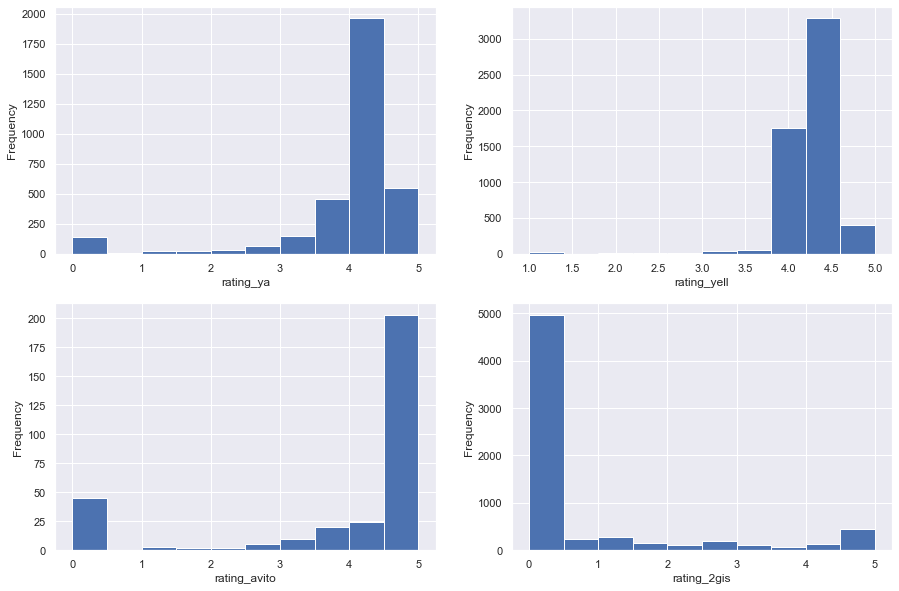

In [215]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    # ax[k].set_title(i)
    ax[k].set_xlabel(i)
    data.loc[data[i] != -1][i].plot(kind="hist", ax=ax[k])
    k += 1

In [216]:
data.loc[data.rating_2gis != -1].rating_2gis.mean()

0.7330523769195867

In [217]:
data.loc[data.rating_2gis != -1].rating_2gis.min()

0.0

In [218]:
data.loc[data.rating_ya != -1].rating_ya.mean()

3.9337455830388692

In [219]:
data.loc[data.rating_avito != -1].rating_avito.mean()

3.920486553432413

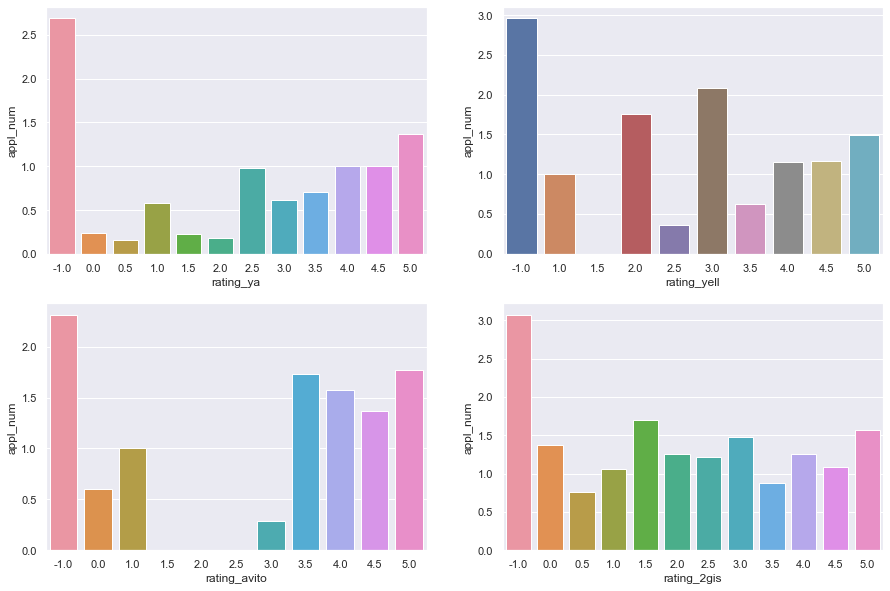

In [220]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    # ax[k].set_title(i)
    data_rating = data.copy()
    data_rating[i] = data_rating[i].apply(lambda x: round(x * 2) / 2)
    sns.barplot(
        ax=ax[k],
        x=data_rating.groupby(i).mean().index,
        y=data_rating.groupby(i).mean().appl_num
    )
    k += 1

In [221]:
data.loc[
    (data.rating_ya == -1) |
    (data.rating_yell == -1) |
    (data.rating_avito == -1) |
    (data.rating_2gis == -1) |
    (data.ratings_cnt_ya == -1)
].appl_num.mean()

2.307299024554322

In [222]:
# phb_all, phb_bad_perc, complaints_num, total_defendant_case_cnt, total_defendant_case_amt

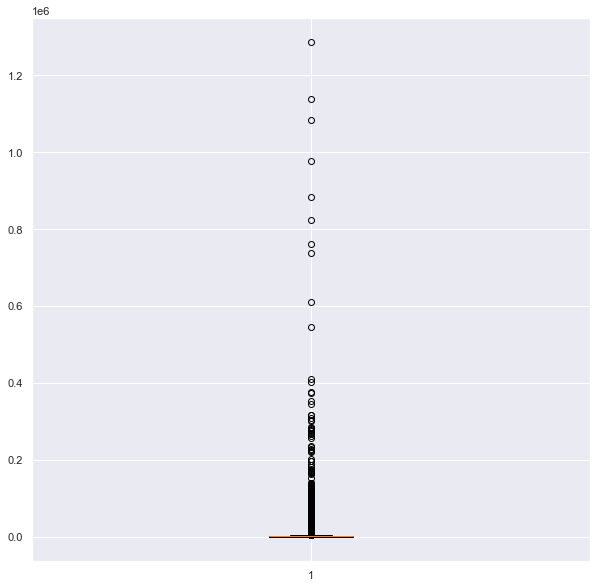

In [223]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.loc[data.phb_all < 1500000].phb_all)
plt.savefig("figures/boxplot_phb_all.png")
plt.show()

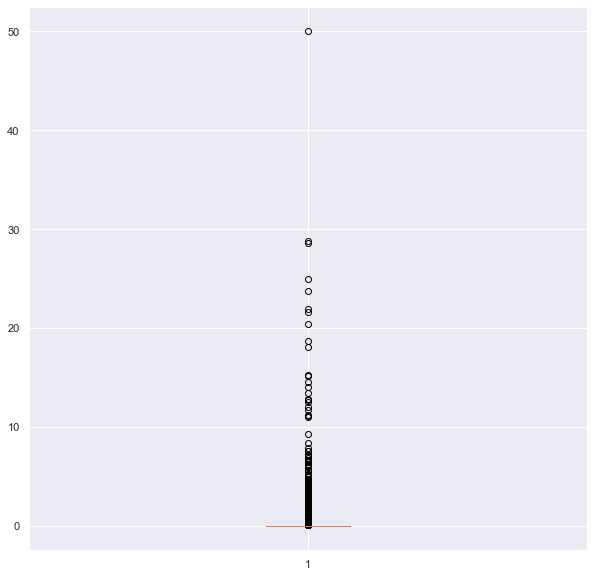

In [224]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.phb_bad_perc)
plt.savefig("figures/phb_bad_perc.png")
plt.show()

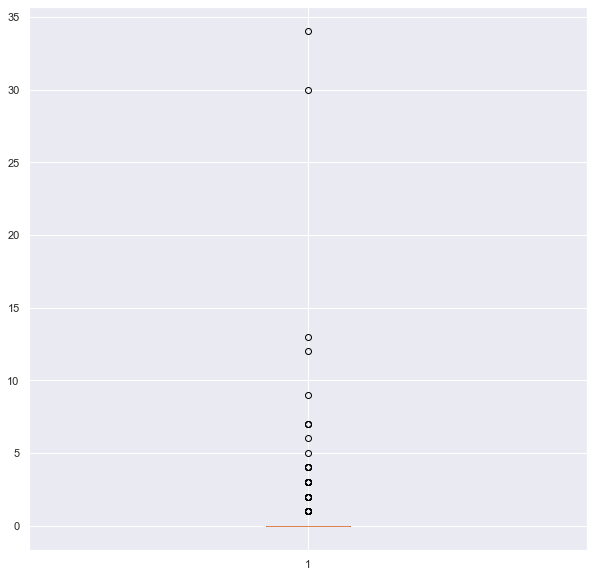

In [225]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.loc[data.total_defendant_case_cnt < 2000].total_defendant_case_cnt)
plt.savefig("figures/boxplot_total_defendant_case_cnt.png")
plt.show()

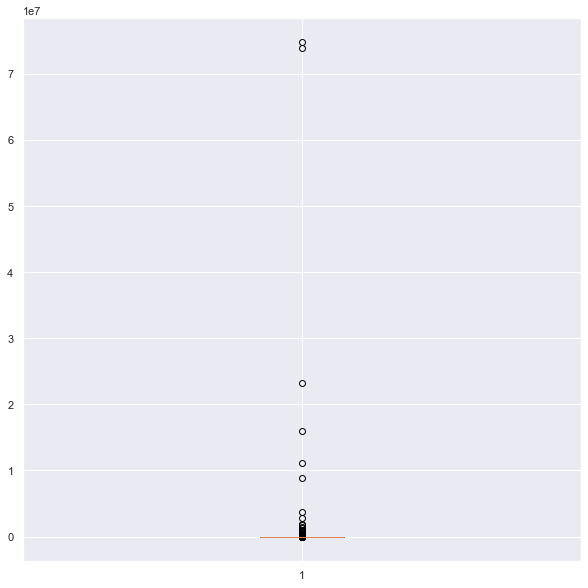

In [226]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.loc[data.total_defendant_case_amt < 3 * 1e10].total_defendant_case_amt)
plt.savefig("figures/boxplot_total_defendant_case_amt.png")
plt.show()

In [227]:
# for i in ["phb_all", "total_defendant_case_amt", "total_defendant_case_cnt", "phb_bad_perc"]:
#     Q1 = data[i].quantile(0.25)
#     Q3 = data[i].quantile(0.75)
#     IQR = Q3 - Q1
#     data = data.loc[(data[i] < Q1-1.5*IQR ) & (data[i] > Q3+1.5*IQR)]

In [240]:
data.phb_all

0         1498.0
1         2421.0
2         1503.0
3           77.0
4        17842.0
          ...   
14995      669.0
14996        1.0
14997      177.0
14998      521.0
14999      311.0
Name: phb_all, Length: 15000, dtype: float64

In [344]:
Q1 = data.phb_all.quantile(0.0)
Q3 = data.phb_all.quantile(0.97)
IQR = Q3 - Q1

In [345]:
data1 = data.loc[(data.phb_all > Q1) & (data.phb_all < Q3)]

In [346]:
data1.shape

(14539, 38)

In [347]:
data.shape

(15000, 38)

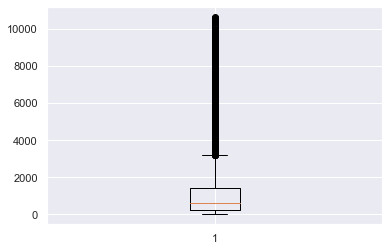

In [348]:
# plt.figure(figsize=(10, 10))
plt.boxplot(data1.phb_all)
plt.show()

In [354]:
data.total_defendant_case_cnt.value_counts()

0.0       14950
1.0          16
3.0          10
2.0           8
4.0           5
7.0           3
2212.0        1
13.0          1
6.0           1
5.0           1
9.0           1
30.0          1
34.0          1
12.0          1
Name: total_defendant_case_cnt, dtype: int64

In [355]:
data.total_defendant_case_amt.value_counts()

0.000000e+00    14952
1.000000e+03        2
1.335332e+06        1
4.978410e+05        1
3.110880e+05        1
9.649280e+05        1
5.627130e+05        1
7.475049e+07        1
2.010380e+05        1
6.150000e+04        1
7.393026e+07        1
6.028800e+04        1
8.899225e+06        1
1.685128e+06        1
1.450000e+04        1
1.180000e+04        1
1.670100e+04        1
1.594060e+07        1
5.000000e+02        1
4.623900e+04        1
2.000000e+03        1
3.767984e+06        1
9.889300e+04        1
4.568000e+04        1
2.323674e+07        1
1.500000e+03        1
5.000000e+03        1
5.473880e+05        1
5.545800e+04        1
1.458701e+06        1
1.973996e+06        1
4.222946e+10        1
6.096060e+05        1
5.760610e+05        1
4.500000e+03        1
2.191000e+05        1
3.000000e+03        1
4.200000e+04        1
6.500000e+03        1
7.037200e+04        1
1.110183e+07        1
4.376950e+05        1
6.048470e+05        1
8.267070e+05        1
1.036400e+04        1
6.511860e+

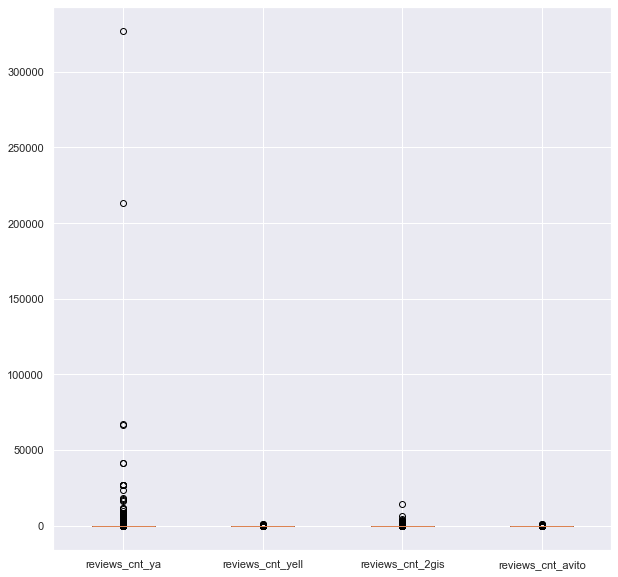

In [370]:
plt.figure(figsize=(10, 10))
plt.boxplot(data[reviews_count_columns], labels=reviews_count_columns)
plt.show()

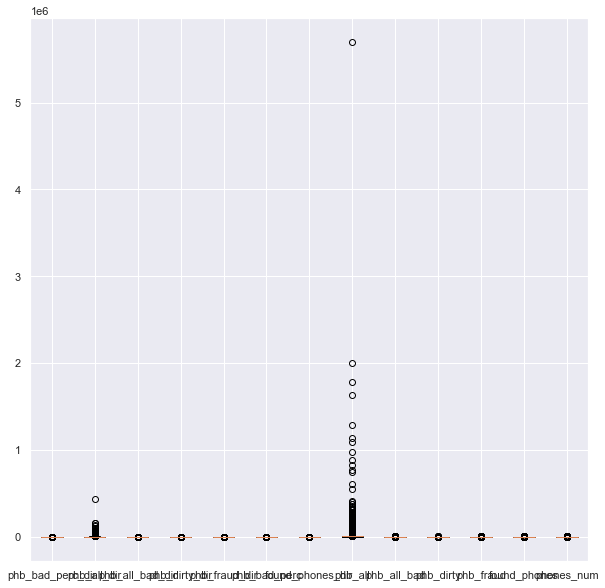

In [375]:
plt.figure(figsize=(10, 10))
plt.boxplot(data[phones], labels=phones)
plt.show()

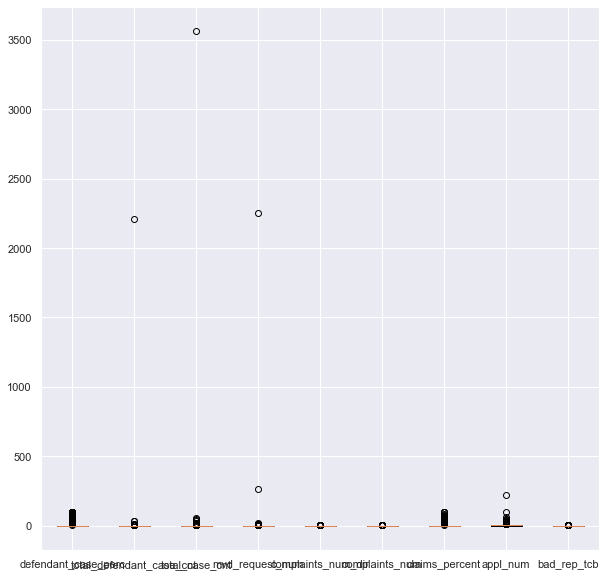

In [377]:
plt.figure(figsize=(10, 10))
plt.boxplot(data[bank_and_police[1:]], labels=bank_and_police[1:])
plt.show()

In [359]:
Q1 = data.phb_bad_perc.quantile(0.0)
Q3 = data.phb_bad_perc.quantile(0.75)
IQR = Q3 - Q1

In [360]:
data1 = data.loc[(data.phb_bad_perc > Q1) & (data.phb_bad_perc < Q3)]

In [361]:
data1.shape

(0, 38)

In [327]:
data.total_defendant_case_amt.max()

42229455258.0

In [328]:
data.loc[data.total_defendant_case_amt == 42229455258]

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito,popularity,mean_rating,all_reviews_cnt
928,a5047227020a,2022-11-01,344,778.0,177.0,955.0,171006.0,0.56,334.0,0.0,...,198.0,4.25,0.0,0.375,2.0,-1.0,-1.0,4,2.008333,199.0


In [231]:
quant = data.phb_all.quantile([0, 0.25, 0.50, 0.75, 1])
def get_size(phb_cnt):
    for i, v in enumerate(quant.values):
        if phb_cnt <= v:
            return i

In [232]:
data['popularity'] = data['phb_all'].apply(lambda x: get_size(x))

In [233]:
rating_columns.remove("ratings_cnt_ya")

In [234]:
def get_mean_rating(row):
    sm = n = 0
    for r in row[rating_columns]:
        if r > 0:
            sm += r
            n += 1
    if n == 0:
        return 0
    return sm / n

data['mean_rating'] = data.apply(lambda x: get_mean_rating(x), axis=1)

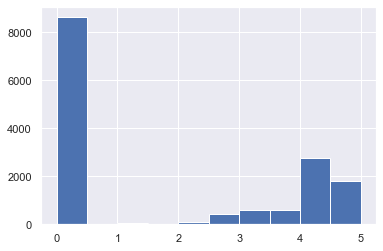

In [235]:
plt.hist(data["mean_rating"])
plt.savefig("mean_rating.png")
plt.show()

In [236]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito',
       'popularity', 'mean_rating'],
      dtype='object')

In [237]:
data['all_reviews_cnt'] = data[reviews_count_columns].sum(axis=1)

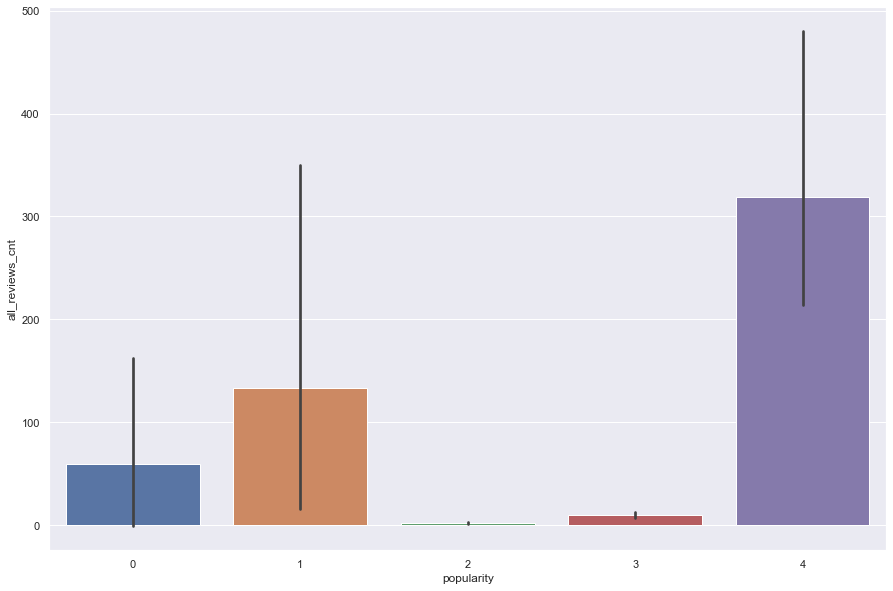

In [238]:
plt.figure(figsize=(15, 10))
sns.barplot(x=data.popularity, y=data.all_reviews_cnt)
plt.savefig("figures/barplot_popularity_all_reviews_cnt.png")

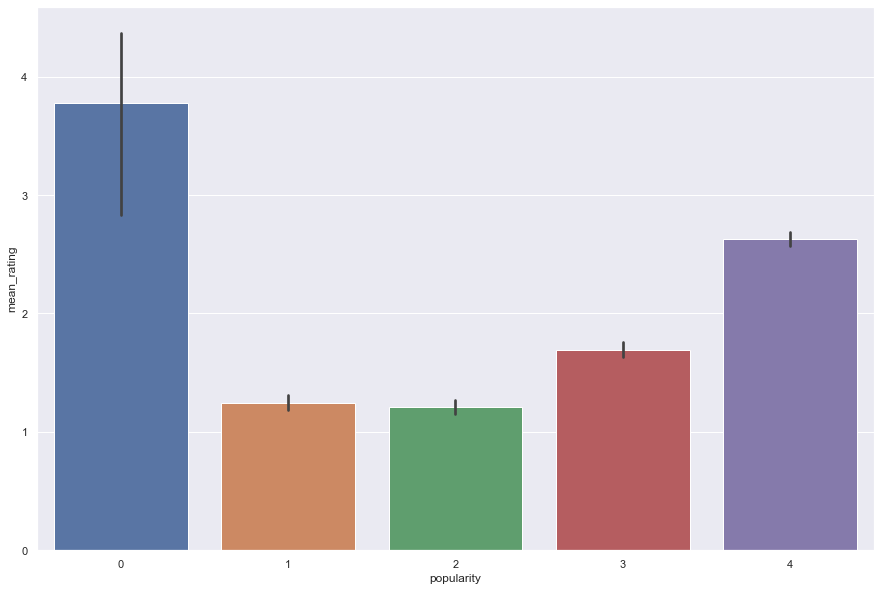

In [239]:
plt.figure(figsize=(15, 10))
sns.barplot(x=data.popularity, y=data.mean_rating)
plt.savefig("figures/barplot_popularity_mean_rating.png")

In [406]:
from scipy.stats import norm